# Class 06: Data Transformation for Machine Learning

## Load Dataset

We'll use the Titanic dataset you're already familiar with.

In [1]:
import pandas as pd
import numpy as np


titanic = pd.read_csv('train.csv')

print(f"Dataset shape: {titanic.shape}")
titanic.head()

Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

# Train/Test Split

Split data FIRST, before any transformation!

In [3]:
X = titanic.drop('Survived', axis=1) # inputs
y = titanic['Survived'] # output

In [4]:
print(f"Features: {X.shape}")
print(f"Target: {y.shape}")
print(f"Survival rate: {y.mean():.2%}")

Features: (891, 11)
Target: (891,)
Survival rate: 38.38%


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
 X,y,test_size=0.2,random_state=42, stratify=y
)

print(f"Training: {len(X_train)}")
print(f"Test: {len(X_test)}")
print(f"Train survival: {y_train.mean():.2%}")
print(f"Test survival: {y_test.mean():.2%}")

Training: 712
Test: 179
Train survival: 38.34%
Test survival: 38.55%


---

# Encoding Categorical Variables

In [6]:
X_train.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

## Label Encoding - Manual

In [7]:
mapping = {
    'male': 0,
    'female': 1
}

In [8]:
unique_values = X_train['Sex'].unique()
mapping = {val: idx for idx, val in enumerate(unique_values)}

print(f"Mapping: {mapping}")

Mapping: {'male': 0, 'female': 1}


In [9]:
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

X_train_enc['Sex'] = X_train['Sex'].map(mapping)
X_test_enc['Sex'] = X_test['Sex'].map(mapping)

In [10]:
print("Before:", X_train['Sex'].head().values)
print("After:", X_train_enc['Sex'].head().values)

Before: ['male' 'male' 'male' 'female' 'female']
After: [0 0 0 1 1]


## Label Encoding - SkLearn

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [12]:
le.fit(X_train['Sex'])

LabelEncoder()

In [13]:
print(f"Learned classes: {le.classes_}")

Learned classes: ['female' 'male']


In [14]:
le.transform(['male', 'male', 'female',"female"])

array([1, 1, 0, 0])

In [15]:
X_train['Sex'] = le.transform(X_train['Sex'])
X_test['Sex'] = le.transform(X_test['Sex'])

print("After encoding:")
print(X_train['Sex'].head())

After encoding:
692    1
481    1
527    1
855    0
801    0
Name: Sex, dtype: int64


## One-Hot Encoding - Manual

In [16]:
categories = X_train['Embarked'].unique()
print(f"Categories: {categories}")

for cat in categories:
    col_name = f'Embarked_{cat}'
    X_train_enc[col_name] = (X_train['Embarked'] == cat).astype(int)
    X_test_enc[col_name] = (X_test['Embarked'] == cat).astype(int)

print("One-hot encoded:")
print(X_train_enc[['Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].tail())

Categories: ['S' 'C' 'Q' nan]
One-hot encoded:
    Embarked  Embarked_C  Embarked_Q  Embarked_S
359        Q           0           1           0
258        C           1           0           0
736        S           0           0           1
462        S           0           0           1
507        S           0           0           1


In [17]:
# Drop first category (avoid dummy trap)
X_train_enc = X_train_enc.drop(['Embarked', 'Embarked_C'], axis=1)
X_test_enc = X_test_enc.drop(['Embarked', 'Embarked_C'], axis=1)

print("After dropping first category:")
print(X_train_enc[['Embarked_Q', 'Embarked_S']].tail())

After dropping first category:
     Embarked_Q  Embarked_S
359           1           0
258           0           0
736           0           1
462           0           1
507           0           1


## Using SkLearn

In [18]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)

ohe.fit(X_train[['Embarked']])

,categories,'auto'
,drop,'first'
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [ ]:
embarked_train = ohe.transform(X_train[['Embarked']])
embarked_test = ohe.transform(X_test[['Embarked']])

embarked_train_c=embarked_train.copy()
embarked_test_c=embarked_test.copy()

embarked_train_df = pd.DataFrame(
    embarked_train,
    columns=ohe.get_feature_names_out(),
    index=X_train.index
)

embarked_test_df = pd.DataFrame(
    embarked_test,
    columns=ohe.get_feature_names_out(),
    index=X_test.index
) #converting array to dataframe
print(embarked_train_df)

#write code whhich drop Embarked_nan column from embarked_train_df and embarked_test_df
embarked_train_df = embarked_train_df.drop('Embarked_nan', axis=1)
embarked_test_df = embarked_test_df.drop('Embarked_nan', axis=1)
print(embarked_train_df)

     Embarked_Q  Embarked_S  Embarked_nan
692         0.0         1.0           0.0
481         0.0         1.0           0.0
527         0.0         1.0           0.0
855         0.0         1.0           0.0
801         0.0         1.0           0.0
..          ...         ...           ...
359         1.0         0.0           0.0
258         0.0         0.0           0.0
736         0.0         1.0           0.0
462         0.0         1.0           0.0
507         0.0         1.0           0.0

[712 rows x 3 columns]


---

# Feature Scaling

## StandardScaler - Manual

In [20]:
age_mean = X_train['Age'].mean()
age_std = X_train['Age'].std()

print(f"Age: mean={age_mean:.2f}, std={age_std:.2f}")

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled['Age'] = (X_train['Age'] - age_mean) / age_std
X_test_scaled['Age'] = (X_test['Age'] - age_mean) / age_std

print("After scaling:")
print(X_train_scaled['Age'].describe())

Age: mean=29.81, std=14.49
After scaling:
count    5.750000e+02
mean     2.780385e-16
std      1.000000e+00
min     -2.028806e+00
25%     -6.080469e-01
50%     -9.027738e-02
75%      6.345999e-01
max      3.465073e+00
Name: Age, dtype: float64


## Using sklearn StandardScaler

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[['Age', 'Fare']])

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[['Age', 'Fare']] = scaler.transform(X_train[['Age', 'Fare']])
X_test_scaled[['Age', 'Fare']] = scaler.transform(X_test[['Age', 'Fare']])

print(f"Learned: mean={scaler.mean_}, std={scaler.scale_}")

Learned: mean=[29.80768696 31.81982626], std=[14.47260957 48.02534305]


## MinMaxScaler - Manual

In [22]:
age_min = X_train['Age'].min()
age_max = X_train['Age'].max()

X_train_minmax = X_train.copy()
X_train_minmax['Age'] = (X_train['Age'] - age_min) / (age_max - age_min)

print(f"Age range: [{age_min}, {age_max}]")
print(f"Scaled to [0, 1]:")
print(X_train_minmax['Age'].describe())

Age range: [0.42, 80.0]
Scaled to [0, 1]:
count    575.000000
mean       0.369285
std        0.182021
min        0.000000
25%        0.258608
50%        0.352852
75%        0.484795
max        1.000000
Name: Age, dtype: float64


---

# Handling Imbalanced Data

Class distribution:
Survived
0    439
1    273
Name: count, dtype: int64
Died: 61.7%
Survived: 38.3%


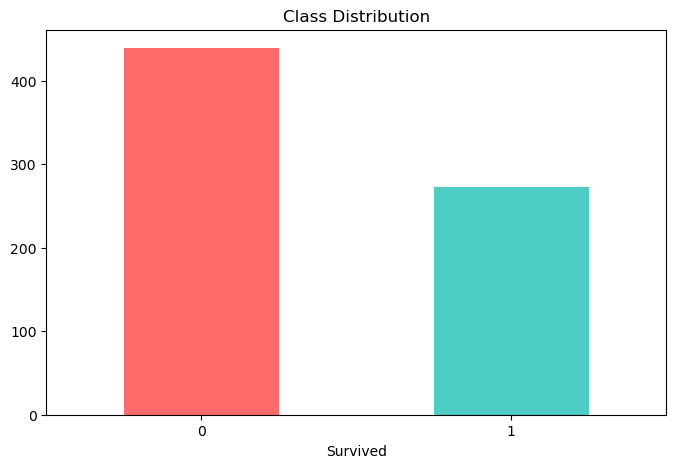

In [ ]:
import matplotlib.pyplot as plt

print("Class distribution:")
print(y_train.value_counts())
print(f"Died: {(y_train==0).mean():.1%}")
print(f"Survived: {(y_train==1).mean():.1%}")

plt.figure(figsize=(8, 5))
y_train.value_counts().plot(kind='bar', color=['#ff6b6b', '#4ecdc4'])

plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()

## Undersampling

In [24]:
died_idx = y_train[y_train == 0].index
survived_idx = y_train[y_train == 1].index

print(f"Died: {len(died_idx)}, Survived: {len(survived_idx)}")

Died: 439, Survived: 273


In [25]:
np.random.seed(42)
died_undersampled = np.random.choice(died_idx, size=len(survived_idx), replace=False)


In [26]:
balanced_idx = np.concatenate([died_undersampled, survived_idx])

In [27]:
X_train_balanced = X_train.loc[balanced_idx]
y_train_balanced = y_train.loc[balanced_idx]

print(f"After undersampling: {len(y_train_balanced)} samples")
print(f"Class 0: {(y_train_balanced==0).sum()}")
print(f"Class 1: {(y_train_balanced==1).sum()}")

After undersampling: 546 samples
Class 0: 273
Class 1: 273


## Class Weights - Manual Calculation

In [29]:
n_samples = len(y_train)
n_classes = 2
n_died = (y_train == 0).sum()
n_survived = (y_train == 1).sum()
print(f"Total samples: {n_samples}")
print(f"Classes: {n_classes}")
print(f"Died: {n_died} ({n_died/n_samples:.1%})")
print(f"Survived: {n_survived} ({n_survived/n_samples:.1%})")

Total samples: 712
Classes: 2
Died: 439 (61.7%)
Survived: 273 (38.3%)


In [55]:
weight_died = 1
weight_survived = n_died / n_survived

print(f"Class 0 weight: {weight_died:.3f}")
print(f"Class 1 weight: {weight_survived:.3f}")

Class 0 weight: 1.000
Class 1 weight: 1.609


In [56]:
weight_died = n_samples / (n_classes * n_died)
weight_survived = n_samples / (n_classes * n_survived)

print(f"Class 0 weight: {weight_died:.3f}")
print(f"Class 1 weight: {weight_survived:.3f}")
print(f"\nRatio: {weight_survived/weight_died:.2f}:1")

Class 0 weight: 0.811
Class 1 weight: 1.305

Ratio: 1.61:1


In [57]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

print(f"Class weights: {class_weights}")


Class weights: [0.81067961 1.3046875 ]
